## Marketing : Quels sont les segments de clients les plus rentables en fonction de leurs interactions avec des campagnes ?

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
-  Teenhome - number of teenagers in customer’s household
-  Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase


### A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

### Step 0:  imports and reading data

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import title

plt.style.use('ggplot') #ggplot
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


In [435]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

### Step 1: Data Understanding
- Dataframe shape
- head and tail
- dytpes
- describe
- nan values

In [274]:
df.shape

(2240, 29)

In [275]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [276]:
df.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [277]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [278]:
#show some statistical information about the numeric series in our dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [279]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Step 2: Data preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming columns
- Feature creation

In [280]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [281]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, errors='coerce', format='%Y-%m-%d')

In [282]:
df.rename(columns={col : col.lower() for col in list(df.columns)}, inplace=True)
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [283]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [284]:
df.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [285]:
# check duplicate in the all dataset meaning if there are two or more rows with the same values
df.loc[df.duplicated()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response


In [286]:
#checking duplicate over a specific column
df.loc[df.duplicated(subset=['income'])]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
44,2139,1975,Master,Married,7500.0,1,0,2013-10-02,19,3,1,10,3,2,12,3,2,0,3,5,0,0,0,0,0,0,3,11,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,3,11,1
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10659,1979,2n Cycle,Together,7500.0,1,0,2013-05-07,7,2,8,11,3,8,21,4,3,2,2,7,0,0,0,0,0,0,3,11,0
2225,4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,3,11,0
2228,8720,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0


In [287]:
# checking an example duplicate
df.query('income == 0')

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response


In [288]:
df['income'].fillna(0, inplace=True)
df.isnull().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
z_costcontact          0
z_revenue              0
response               0
dtype: int64

### Step 3: Feature Understanding
(Univaraite Analysis)
- PLotting Feature Distributions
    -   Histogram
    -   KDE
    -   Boxplot

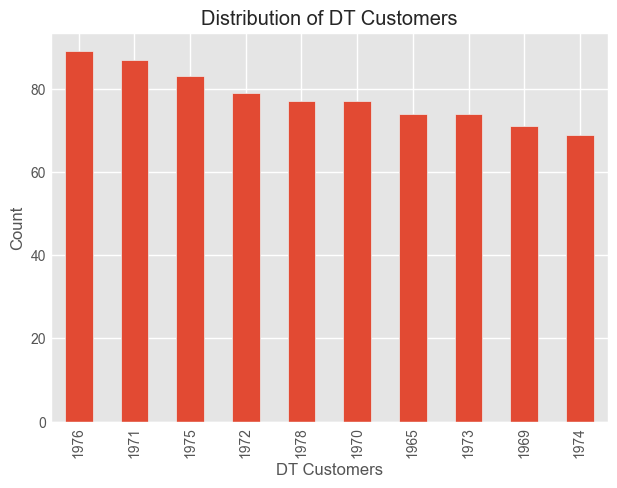

In [289]:
ax = df.year_birth.value_counts().head(10).plot(kind='bar', title='Distribution of DT Customers')
ax.set_xlabel('DT Customers')
ax.set_ylabel('Count')
plt.show()

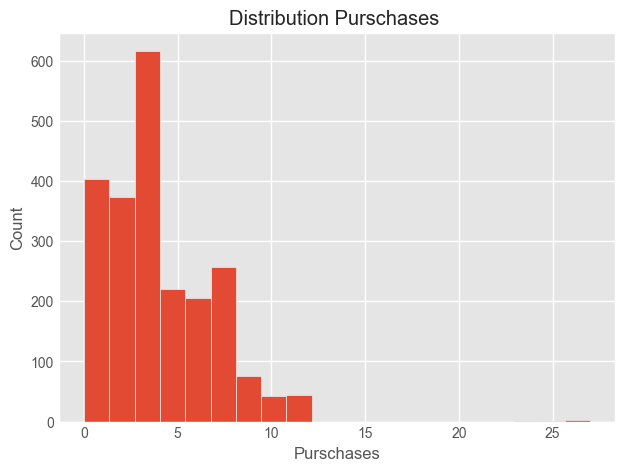

In [290]:
ax = df.numwebpurchases.plot(kind='hist', title='Distribution Purschases ', bins=20)
ax.set_xlabel('Purschases')
ax.set_ylabel('Count')
plt.show()

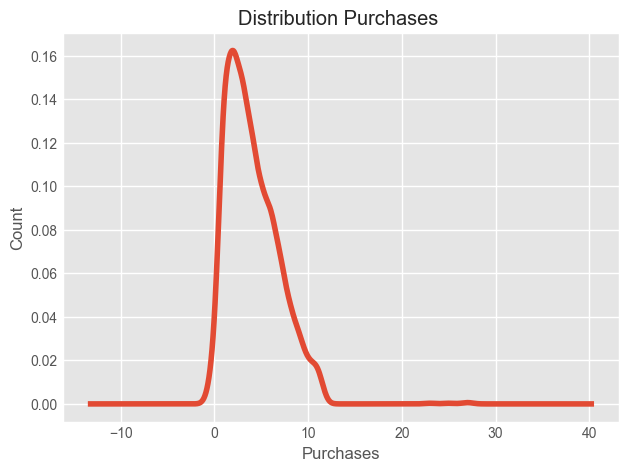

In [291]:
ax = df.numwebpurchases.plot(kind='kde', title='Distribution Purchases ')
ax.set_xlabel('Purchases')
ax.set_ylabel('Count')
plt.show()

In [380]:
px.histogram(df, x='dt_customer', title='Distribution Purchases')

### Step 4: Feature Relationship
- Scatterplot
- Heatmap Correlation
- Paiplot
- Groupby comparisons

<Axes: title={'center': 'number of purchase vs income'}, xlabel='numwebpurchases', ylabel='income'>

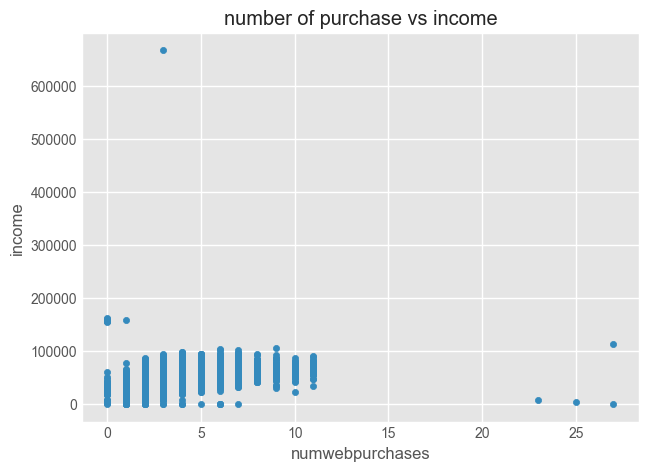

In [292]:
df.plot(kind='scatter', x='numwebpurchases', y='income', title='number of purchase vs income')

In [381]:
#sns.scatterplot( x='numwebpurchases', y='income' , hue='id', data=df)
px.scatter(df,x='numwebpurchases', y='income' )

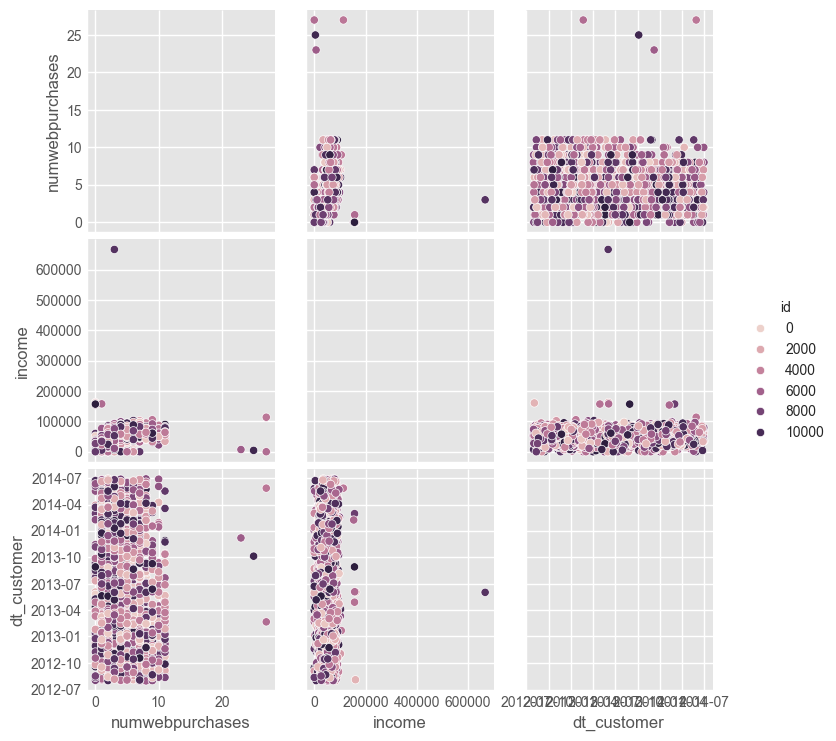

In [294]:
sns.pairplot(df, vars=['numwebpurchases', 'income', 'dt_customer'], hue='id')
plt.show()

In [295]:
df_cor = df[['year_birth', 'income', 'kidhome',
       'teenhome']].corr()

<Axes: >

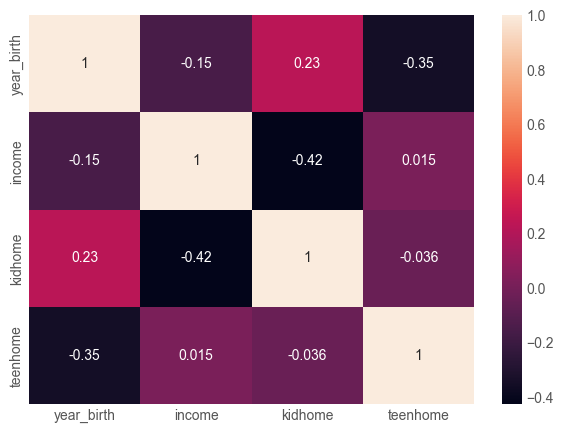

In [296]:
sns.heatmap(df_cor, annot=True)

### Step 5: Ask a Question about the data
  -  Try to  answer a question you have about the using a plot statistic
1. Customer Engagement with Campaigns
- Which marketing campaign had the highest acceptance rate?

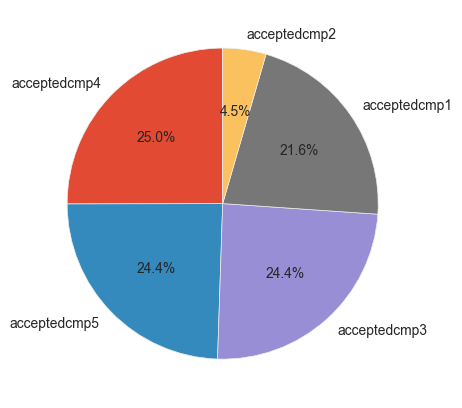

In [382]:
df_cam = df[[f'acceptedcmp{i}' for i in range(1, 6)]].sum()\
         .to_frame(name="sum")\
         .sort_values('sum', ascending=False)
df_cam = df_cam.apply(lambda row: (row['sum']/df_cam['sum'].sum())*100, axis=1).to_frame(name="rate")
# Calculate angles for each sector
angles = [f * 360 for f in df_cam['rate'].values]
# Create the pie chart
plt.pie(angles, labels=df_cam.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [383]:
px.pie(df, names=df_cam.index, values=df_cam['rate'].values)

- What is the overall response rate to marketing campaigns?

In [298]:
#rate of customer who reacts after campaign
resp_rate = df[df['response']==1].id.count()/df.id.count()
print(f"The overall response Rate: {resp_rate*100:.2f}% ")

The overall response Rate: 14.91% 


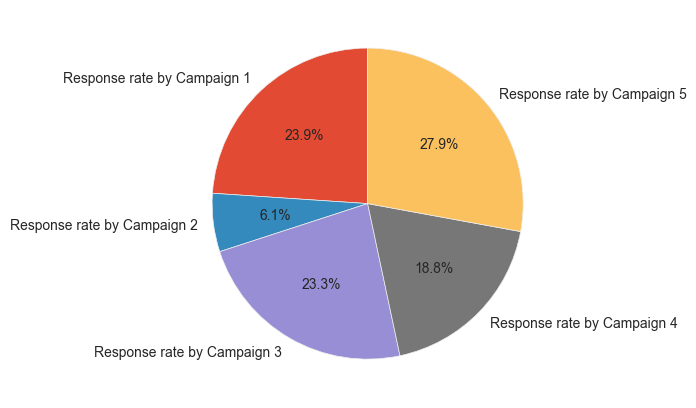

In [299]:
resp_rate_list = [df[(df['response']==1) & (df[f'acceptedcmp{i}']==1)].id.count()/df.id.count() for i in range(1, 6)]
# Calculate angles for each sector
angles = [f * 360 for f in resp_rate_list]
# Create the pie chart
plt.pie(angles, labels=[f'Response rate by Campaign {i}' for i in range(1,6)], autopct='%1.1f%%', startangle=90 )
plt.show()

Do customers who responded to previous campaigns have a higher likelihood of accepting the latest campaign?

In [313]:
from scipy import stats
# 1. Create a new column 'RespondedToPrevious' based on previous campaign responses
df['RespondedToPrevious'] = df[[f'acceptedcmp{i}' for i in range(1,6)]].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
# 2. Calculate the acceptance rate for responders and non-responders to previous campaigns
responders = df[df['RespondedToPrevious'] == 1]
non_responders = df[df['RespondedToPrevious'] == 0]

# Calculate acceptance rate for each group
acceptance_rate_responders = responders['response'].mean()
acceptance_rate_non_responders = non_responders['response'].mean()

print(f"Acceptance rate for responders: {acceptance_rate_responders * 100:.2f}%")
print(f"Acceptance rate for non-responders: {acceptance_rate_non_responders * 100:.2f}%")

# 3. Conduct statistical test to check if the difference in acceptance rates is significant
# We'll use a chi-square test for independence (as we're dealing with categorical data)
contingency_table = pd.crosstab(df['RespondedToPrevious'], df['response'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"contingency table:\n {contingency_table}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("correlation entre le fait d'accepter une de precedente campagne publicitaire et \n de repondre positivement a la derniere.")
else:
    print("il n'y'a pas assez de preuve qui refuse correlation entre le fait d'accepter une de precedente campagne publicitaire et de repondre positivement a la derniere.")


Acceptance rate for responders: 40.60%
Acceptance rate for non-responders: 8.22%
contingency table:
 response                0    1
RespondedToPrevious           
0                    1631  146
1                     275  188
Chi-square statistic: 301.14
P-value: 0.0000
correlation entre le fait d'accepter une de precedente campagne publicitaire et 
 de repondre positivement a la derniere.


Are there any trends in customer response behavior over multiple campaigns?

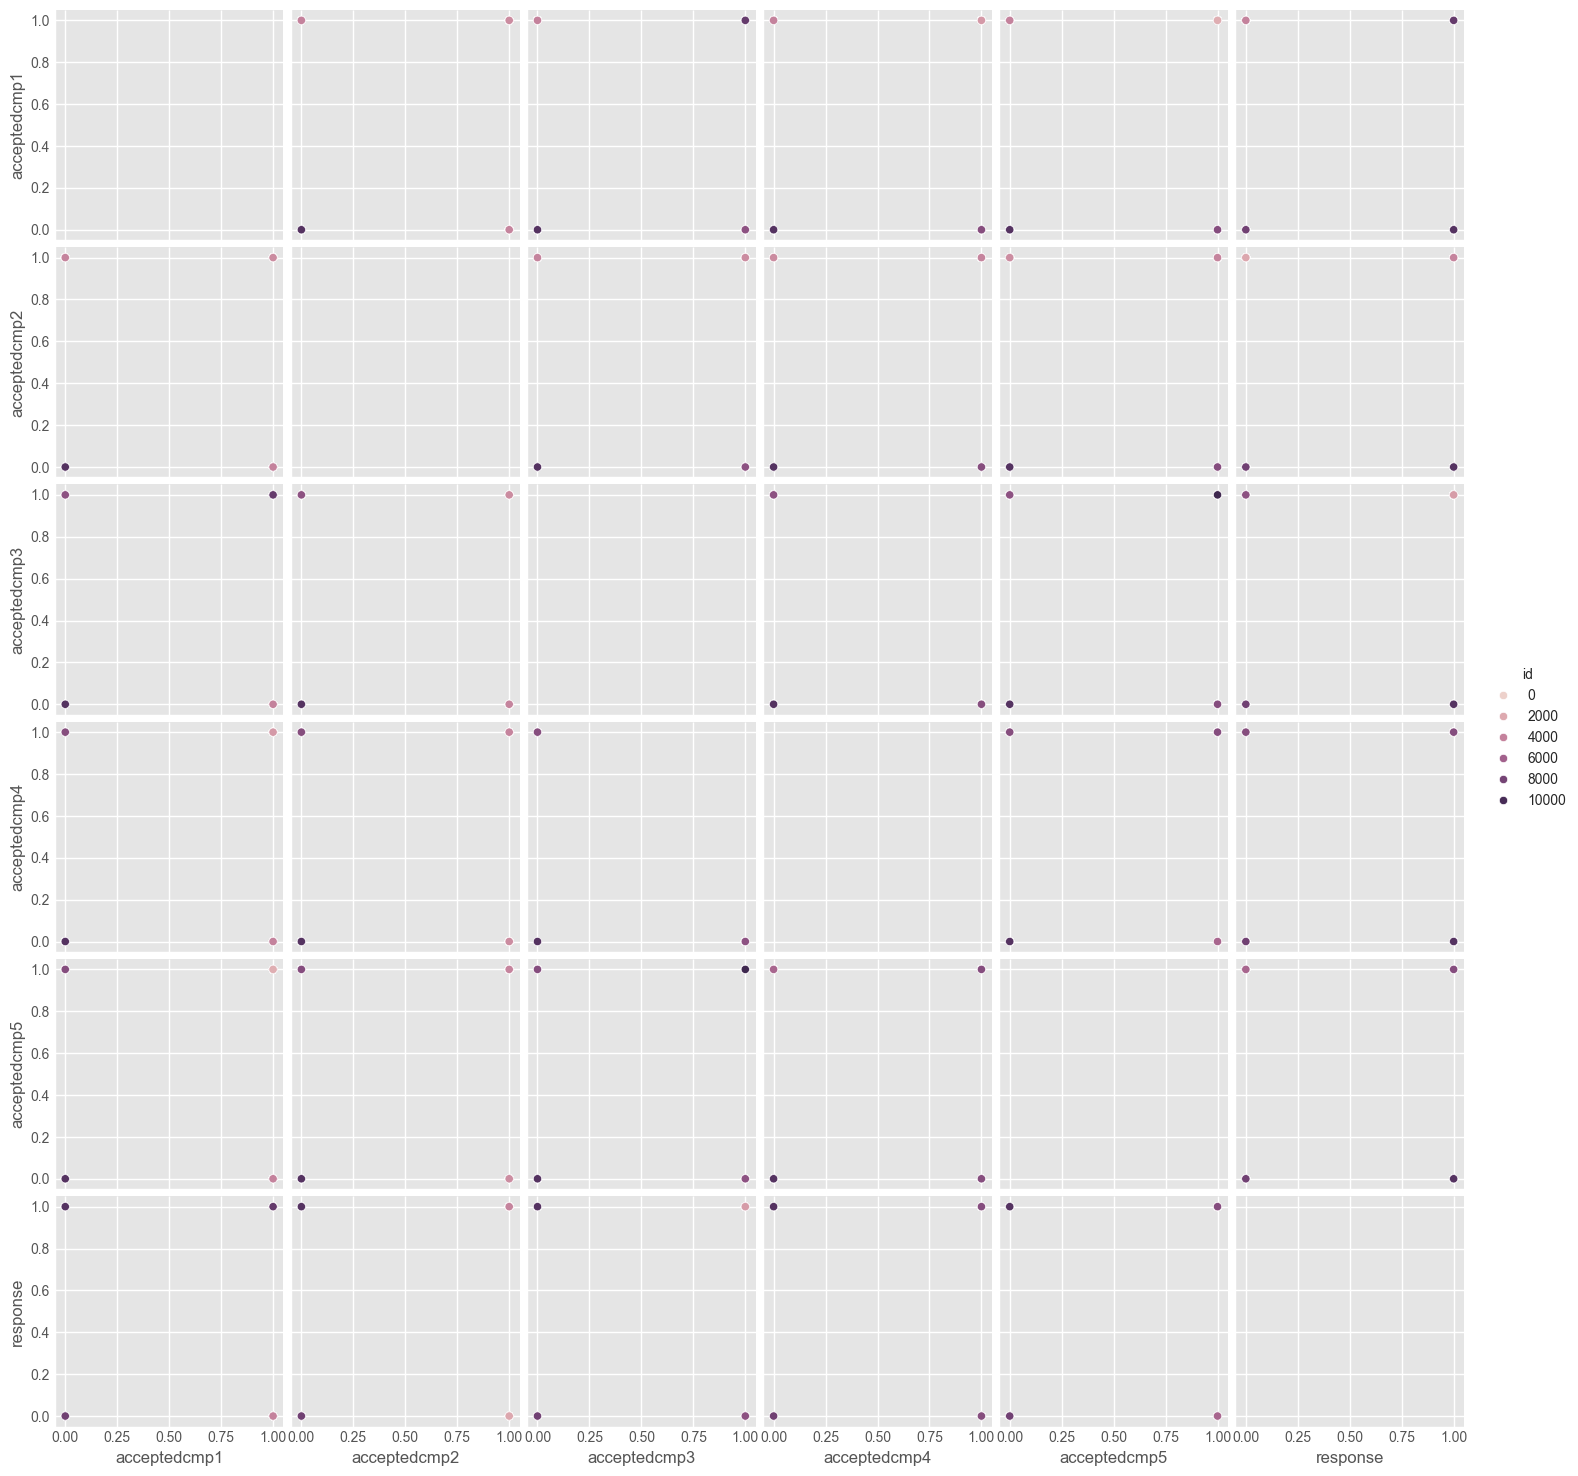

In [301]:
acceptance_col = [f'acceptedcmp{i}' for i in range(1,6)] + ['response']
sns.pairplot(df, vars=acceptance_col, hue='id')
plt.show()

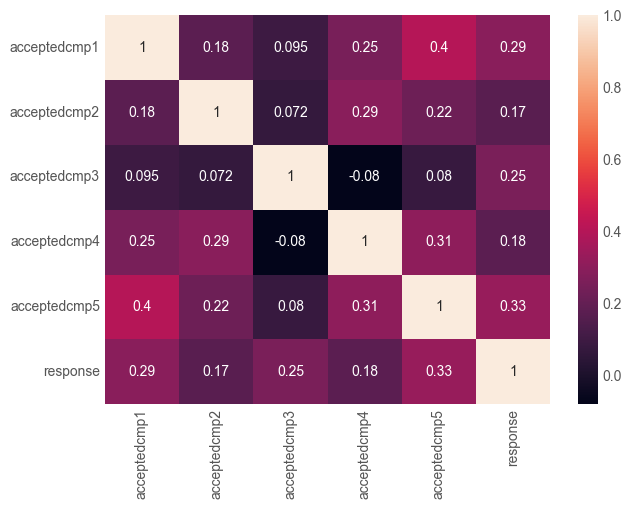

In [302]:
sns.heatmap(df[acceptance_col].corr(), annot=True)
plt.show()

2. Customer Profitability & Spending Patterns
    - What is the average income of customers who accepted the latest campaign versus those who didn’t?

In [303]:
avg_accept_last = df.query('response == 1')['income'].mean()
avg_no_accept_last = df.query('response == 0')['income'].mean()
print(f"The average income of customer accept last campaign: {avg_accept_last:.2f}")
print(f"The average income of customer don't accept last campaign: {avg_no_accept_last:.2f}")

The average income of customer accept last campaign: 60029.41
The average income of customer don't accept last campaign: 50225.65


In [304]:
acceptance_responders = df.query('response == 1')['income'].values
acceptance_non_responders = df.query('response == 0')['income'].values
t_statistic , p_value=stats.ttest_ind(acceptance_responders, acceptance_non_responders)

print(f"t-Statistik: {t_statistic:.2f}")
print(f"p-Wert: {p_value:.3f}")
if p_value < 0.05:
    print("The difference in average income between customers who response and who didn't  is statistically significant.")
else :
    print("The difference in average income between customers who response and who didn't  is statistically significant is not statistically significant.")


t-Statistik: 6.51
p-Wert: 0.000
The difference in average income between customers who response and who didn't  is statistically significant.


 Which product categories (wine, meat, gold, etc.) contribute the most to total spending?

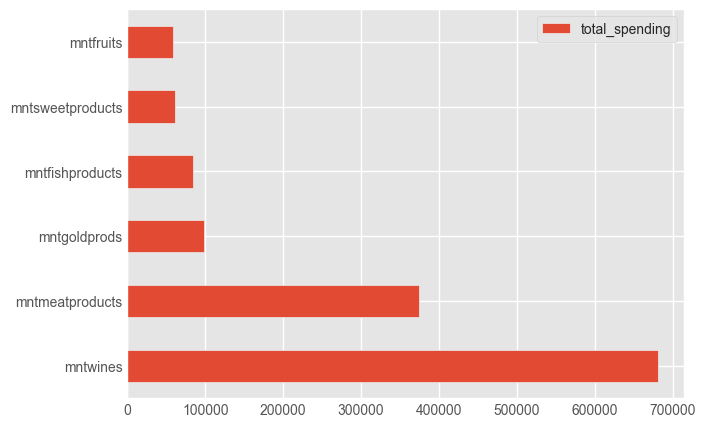

In [305]:
df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldprods']]\
    .sum()\
    .to_frame('total_spending')\
    .sort_values(by =['total_spending'],ascending=False)\
    .plot(kind='barh')
plt.show()

- Are high-spending customers more likely to accept marketing campaigns?

In [432]:
df['customer_spending'] = df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldprods']].sum(axis=1)
df['group_spending'] = df['customer_spending'].apply(lambda x : 0 if x < df['customer_spending'].quantile(0.25) else 1
                               if  df['customer_spending'].quantile(0.25) <=x< df['customer_spending'].quantile(0.75) else 2 )


contingency_table = pd.crosstab(df['group_spending'], df['RespondedToPrevious'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"contingency table:\n {contingency_table}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a dependence between the customer's spending behavior and response to a marketing campaign ")
else:
    print("There is an independence between the customer's spending behavior and response to a marketing campaign")

contingency table:
 RespondedToPrevious    0    1
group_spending               
0                    520   40
1                    950  170
2                    307  253
Chi-square statistic: 288.23
P-value: 0.0000
There is a dependence between the customer's spending behavior and response to a marketing campaign 


 - Do customers who purchase through discounts (NumDealsPurchases) have different spending behaviors compared to those who don’t?

In [307]:
group_deal = df.query('numdealspurchases > 0')['customer_spending']
group_not_deal = df.query('numdealspurchases == 0')['customer_spending']
t_statistic, p_value = stats.ttest_ind(group_deal, group_not_deal)
print(f"t-Statistik: {t_statistic:.2f}")
print(f"p-Wert: {p_value:.3f}")
if p_value < 0.05:
    print("The difference in  average sepending behavior is statistically significant.")
else :
    print("The difference in  average sepending behavior is not statistically significant.")

t-Statistik: -7.24
p-Wert: 0.000
The difference in  average sepending behavior is statistically significant.


3. Customer Segmentation Based on Demographics
   -  How does education level correlate with marketing campaign acceptance?

In [308]:
contingency_table = pd.crosstab(df['RespondedToPrevious'], df['education'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"contingency table:\n {contingency_table}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("The correlation between customer education leveland accept marketing is statistically significant.")
else:
    print("There is no correlation between customer education level and accept marketing")


contingency table:
 education            2n Cycle  Basic  Graduation  Master  PhD
RespondedToPrevious                                          
0                         165     48         897     295  372
1                          38      6         230      75  114
Chi-square statistic: 5.87
P-value: 0.2094
There is no correlation between customer education level and accept marketing


   - Does marital status impact the likelihood of responding to a campaign?
      - A high chi-square value would indicate a strong difference between observed and expected frequencies.
      - Here, the low chi-square value means the differences in response rates across marital statuses are small and likely due to randomness.
      - If marital status and past campaign response are independent, it means knowing a customer's marital status gives no information about whether they responded to previous campaigns.
      - If they are dependent, it means marital status influences the likelihood of having responded to previous campaigns.

In [332]:
contingency_table = pd.crosstab(df['marital_status'], df['response'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"contingency table:\n {contingency_table}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("customer's marital status and last campaign response are dependent.")
else:
    print("customer's marital status and last campaign response are independent.")

contingency table:
 response          0    1
marital_status          
Absurd            1    1
Alone             2    1
Divorced        184   48
Married         766   98
Single          374  106
Together        520   60
Widow            58   19
YOLO              1    1
Chi-square statistic: 54.24
P-value: 0.0000
customer's marital status and last campaign response are dependent.


Marital status does significantly influence response to the last campaign. Customer behavior can change over time, and factors affecting
acceptance may vary by campaign

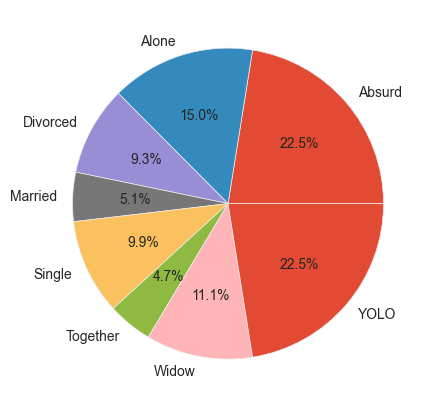

In [350]:
marital_status = contingency_table.index.values
married_counts = [contingency_table.loc[status, 1]*100 /(contingency_table.loc[status, 1] +contingency_table.loc[status, 0]) for status in marital_status]
f = [360*f for f in married_counts]
plt.pie(f, labels=marital_status, autopct='%1.1f%%')
plt.show()

In [322]:
contingency_table = pd.crosstab(df['marital_status'], df['RespondedToPrevious'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"contingency table:\n {contingency_table}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("customer's marital status and past campaign response are dependent.")
else:
    print("customer's marital status and past campaign response are independent.")

contingency table:
 RespondedToPrevious    0    1
marital_status               
Absurd                 1    1
Alone                  2    1
Divorced             186   46
Married              682  182
Single               382   98
Together             464  116
Widow                 58   19
YOLO                   2    0
Chi-square statistic: 2.98
P-value: 0.8871
customer's marital status and past campaign response are independent.


Even though response rates looked different, the statistical test shows that those differences are not meaningful (probably due to chance).
Therefore, we should not use marital status alone to predict whether someone will respond to a campaign.

In [310]:
Which purchasing channel (web, store, catalog) is the most popular among customers who accept marketing campaigns?

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'RespondedToPrevious', 'customer_spending', 'group_spending'],
      dtype='object')

-  Are there significant differences in spending patterns between different income groups?

In [367]:
income = []
for i in range(3):
    income.append(df.query(f'group_spending == {i}')['income'].values)
# ANOVA
f_value, p_value = stats.f_oneway(*income)
print(f"F-Statistik: {f_value:.2f}")
print(f"p-Wert: {p_value:.3f}")
if p_value < 0.05:
    print("the mean income between the patterns spending is statistically different.")
else:
    print("the mean income between the patterns spending is the same.")

F-Statistik: 609.25
p-Wert: 0.000
the mean income between the patterns spending is statistically different.


In [438]:
df['group_income'] = df['Income'].apply(lambda x : 'poor' if x < df['Income'].quantile(.25) else 'normal' if x<= df['Income'].quantile(.75) else 'rich')
'''
contingency_table = pd.crosstab(df['group_income'], df['group_spending'],)
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"contingency table:\n {contingency_table}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("group of income likely influence the behavior of customer to high spend.")
else:
    print("group of income doesn't impact of the behavior of customer to high spend")
'''
df.group_income.unique()

array(['normal', 'rich', 'poor'], dtype=object)

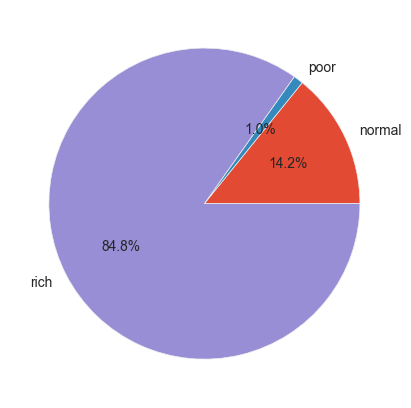

In [369]:
label = contingency_table.index.values
ratio = []
for l in label:
    ratio.append(contingency_table.loc[l, 2] /sum(contingency_table.loc[l, i] for i in range(3)))
f = [360*f for f in ratio]
plt.pie(f, labels=label, autopct='%1.1f%%')
plt.show()

4. Purchase Behavior & Channel Preferences
- Which purchasing channel (web, store, catalog) is the most popular among customers who accept marketing campaigns?

In [399]:
df_purchases = df.query('RespondedToPrevious >= 1')[['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases']]\
    .sum()\
    .to_frame('total purchases')\
    .sort_values('total purchases', ascending=False)#.plot.barh()
px.pie(df_purchases, names=df_purchases.index.values, values='total purchases')

In [389]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'RespondedToPrevious', 'customer_spending', 'group_spending',
       'group_income'],
      dtype='object')

- How does the number of website visits per month relate to purchases made online?

In [406]:
df["segement_numberwebvisit"] = df["numwebvisitsmonth"].apply(lambda x : "high" if x > df["numwebvisitsmonth"].mean() else "low")
df["segement_numberwebpurchases"] = df["numwebpurchases"].apply(lambda x : "high" if x > df["numwebpurchases"].mean() else "low")

contingency_table = pd.crosstab(df['segement_numberwebvisit'], df['segement_numberwebpurchases'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"contingency table:\n {contingency_table}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("number of website visits month likely influence the number of website purchases.")
else:
    print("number of website visits month doesn't impact number of website purchases.")

contingency table:
 segement_numberwebpurchases  high  low
segement_numberwebvisit               
high                          396  774
low                           452  618
Chi-square statistic: 16.39
P-value: 0.0001
number of website visits month likely influence the number of website purchases.


- Do customers who frequently purchase via catalog respond differently to marketing campaigns than in-store shoppers?

In [415]:
catalogue = df.query('numcatalogpurchases > numstorepurchases')['RespondedToPrevious'].mean()
stores = df.query('numcatalogpurchases < numstorepurchases')['RespondedToPrevious'].mean()
print(f"Respond rate by frequently purchase via catalogue: {catalogue}")
print(f"Respond rate by frequently purchase via store: {stores}")

Respond rate by frequently purchase via catalogue: 0.4226190476190476
Respond rate by frequently purchase via store: 0.18432948267202412


5. Customer Loyalty & Complaints
    - How does the number of days since the last purchase (Recency) impact campaign response rates?
    - Do customers who complain tend to spend less or respond less to marketing campaigns?
    - Is there a correlation between previous complaints and campaign acceptance?

In [421]:
df['range_days'] = df['recency'].apply(lambda x : "low days" if x < df['recency'].mean() else "high days")
contingency_table = pd.crosstab(df['range_days'], df['RespondedToPrevious'])
chi2_stat, p_val=  stats.fisher_exact(contingency_table)
print(f"contingency table:\n {contingency_table}")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("number days since the last purchase impact campaign response rate")
else:
    print("number days since the last purchase doesn't influence campaign response rate")

contingency table:
 RespondedToPrevious    0    1
range_days                   
high days            893  225
low days             884  238
Chi-square statistic: 1.07
P-value: 0.5316
number days since the last purchase doesn't influence campaign response rate


In [429]:
print(f"average spending for customers who complain the last 2 years: {df.query('complain == 1')['customer_spending'].mean()}")
print(f"average spending for customers who doesn't complain the last 2 years: {df.query('complain == 0')['customer_spending'].mean()}")

average spending for customers who complain the last 2 years: 376.42857142857144
average spending for customers who doesn't complain the last 2 years: 607.9689049121225


In [431]:
print(f"response rate for customers who complain the last 2 years: {df.query('complain == 1')['RespondedToPrevious'].mean()}")
print(f"response rate for customers who doesn't complain the last 2 years: {df.query('complain == 0')['RespondedToPrevious'].mean()}")

response rate for customers who complain the last 2 years: 0.09523809523809523
response rate for customers who doesn't complain the last 2 years: 0.2077512392969806


6. Predictive Insights
   -  Can we identify key customer attributes that predict campaign acceptance?
   - Are there specific customer segments that are highly engaged and profitable?
   - What characteristics define the most valuable customers who respond positively to marketing efforts?

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'RespondedToPrevious', 'customer_spending', 'group_spending',
       'group_income', 'segement_numberwebvisit',
       'segement_numberwebpurchases', 'range_days'],
      dtype='object')